In [35]:
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [ ]:
relevant_cols = ["What's your hometown?"]
hometown_df = class_df[relevant_cols].dropna().rename(columns={
    "What's your hometown?": "hometown"
})

hometown_df.head(10)

In [38]:
hometown_unnamed = hometown_df.groupby('hometown')['hometown'].count()

hometown_unnamed

hometown
Alberta                       2
British Columbia              3
Durham Region                 3
Halton Region                 6
International                10
Kitchener/Waterloo Region     9
Niagara Region                1
Other                         1
Ottawa–Gatineau Region        3
Peel Region                  17
Toronto Region               21
USA                           4
York Region                  14
Name: hometown, dtype: int64

In [39]:
remove = []
hometown = hometown_unnamed.rename(index={"Other": "Other Ontario"})
for index, num_people in hometown.items():
    if num_people <= 1 and index != 'Other':
        hometown['Other Ontario'] += num_people
        remove.append(index)


hometown.drop(labels=remove, inplace=True)
hometown

hometown
Alberta                       2
British Columbia              3
Durham Region                 3
Halton Region                 6
International                10
Kitchener/Waterloo Region     9
Other Ontario                 2
Ottawa–Gatineau Region        3
Peel Region                  17
Toronto Region               21
USA                           4
York Region                  14
Name: hometown, dtype: int64

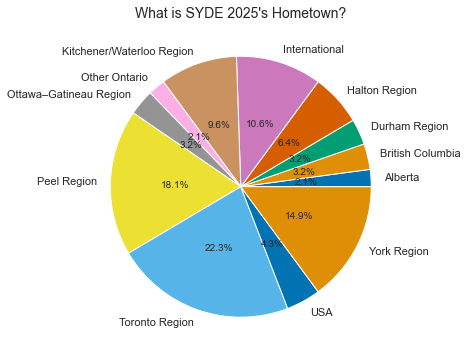

In [40]:
pie, ax = plt.subplots(figsize=[10,6])
labels = hometown.keys()
plt.pie(x=hometown, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("What is SYDE 2025's Hometown?", fontsize=14);
pie.savefig("outputs/hometown.png")

In [ ]:
hometown_df['Number of people'] = hometown_df.groupby(['hometown'])['hometown'].transform('count')
hometown_df = hometown_df.drop_duplicates(subset=['hometown', 'Number of people'], keep='first')

hometown_df

In [ ]:
total_respondants = hometown_df['Number of people'].sum()
hometown_df['Percentage of people'] = (hometown_df['Number of people'] / total_respondants) * 100
hometown_df

Text(0, 0.5, 'Percentage of Respondents (%)')

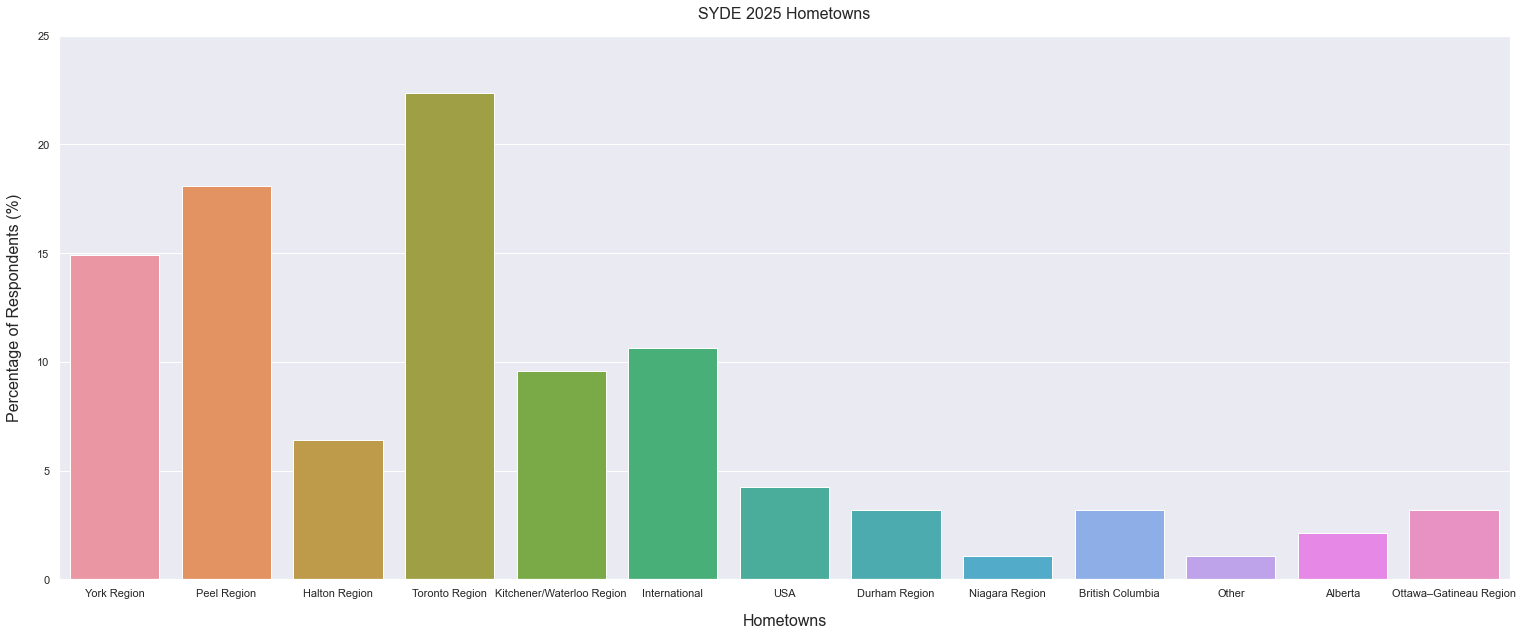

In [43]:
plt.figure(figsize=(26,10))
plt.title("SYDE 2025 Hometowns", fontsize=16, y=1.02)
sns.set_theme(palette="colorblind")
ax = sns.barplot(x=hometown_df['hometown'],y=hometown_df['Percentage of people'], data=hometown_df)
ax.set(ylim=(0, 25))
plt.xlabel("Hometowns", labelpad=15, fontsize=16)
plt.ylabel("Percentage of Respondents (%)", labelpad=15, fontsize=16)